In [29]:
from google.colab import drive
drive.mount('/content/drive')


folder_path = '/content/drive/MyDrive/Python'
import os


all_files = os.listdir(folder_path)
target_files = [
    f for f in all_files if f.endswith('.csv') or f.endswith('.xlsx')
]

print(target_files)


# Leer y concatenar todos los archivos
import pandas as pd
import os
dataframes = []
for file in target_files:
    file_path = os.path.join(folder_path, file)
    if file.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    dataframes.append(df)

# Concatenar todos los DataFrames en uno solo
df_total = pd.concat(dataframes, ignore_index=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Planificado.xlsx', 'Planificado1.xlsx']


In [30]:
!pip install streamlit


In [31]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension



Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [32]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [33]:
# Cambiar los nombres de los encabezados
df_total.columns = ['IdMdTransp','IdentMedTransp','Doccompr','Ce','Unmanip','Clasedeproceso','Recepcionado','Fechaplanificada','FechaHora','Cen1','Proveedor','Fecharecepcion','Horarecepcion','Confirmadopor','Fechahorarecepcion','Fechasalida','Horasalida','Fechahorasalida','Enramp','Contabilizacion','desenrampe','Activacion','Fecharecibidoatienda','Horaderecepción']  # Ajusta según la estructura real

# Verifica el cambio
df_total.head()

,IdMdTransp,IdentMedTransp,Doccompr,Ce,Unmanip,Clasedeproceso,Recepcionado,Fechaplanificada,FechaHora,Cen1,...,Fechahorarecepcion,Fechasalida,Horasalida,Fechahorasalida,Enramp,Contabilizacion,desenrampe,Activacion,Fecharecibidoatienda,Horaderecepción
0,MES0000000127,MES0000000127-001,32713899,1,C54740926,1013.0,1,2025-05-26,70000,880,...,2025-05-26 12:27:19,2025-05-26 00:00:00,21:02:56,2025-05-26 21:02:56,26.05.2025 15:53:18,26.05.2025 20:34:01,26.05.2025 20:34:03,26.05.2025 15:52:05,NaN,NaN
1,MES0000000127,MES0000000127-001,32713899,2,C54740927,1013.0,1,2025-05-26,70000,880,...,2025-05-26 12:27:02,2025-05-27 00:00:00,15:40:17,2025-05-27 15:40:17,26.05.2025 15:53:18,26.05.2025 20:34:01,26.05.2025 20:34:03,26.05.2025 15:52:05,NaN,NaN
2,MES0000000127,MES0000000127-001,32713899,3,C54740928,1013.0,1,2025-05-26,70000,880,...,2025-05-26 12:27:07,2025-05-26 00:00:00,20:08:00,2025-05-26 20:08:00,26.05.2025 15:53:18,26.05.2025 20:34:01,26.05.2025 20:34:03,26.05.2025 15:52:05,NaN,NaN
3,MES0000000127,MES0000000127-001,32713899,4,C54740929,1013.0,1,2025-05-26,70000,880,...,2025-05-26 12:27:24,2025-05-26 00:00:00,17:23:47,2025-05-26 17:23:47,26.05.2025 15:53:18,26.05.2025 20:34:01,26.05.2025 20:34:03,26.05.2025 15:52:05,NaN,NaN
4,MES0000000127,MES0000000127-001,32713899,5,C54740930,1013.0,1,2025-05-26,70000,880,...,2025-05-26 12:26:53,2025-05-26 00:00:00,17:39:11,2025-05-26 17:39:11,26.05.2025 15:53:18,26.05.2025 20:34:01,26.05.2025 20:34:03,26.05.2025 15:52:05,NaN,NaN


In [34]:
df_total['Fechahorasalida'] = pd.to_datetime(df_total['Fechahorasalida'], errors='coerce')
df_total['Fechahorarecepcion'] = pd.to_datetime(df_total['Fechahorarecepcion'], errors='coerce')

In [35]:
df_total['Tiempointerno'] = df_total['Fechahorasalida'] - df_total['Fechahorarecepcion']


In [36]:
cen_map = {
    '880': 'Liverpool Crossdock',
    '895': 'Liverpool Almacenaje',
    '880S': 'Suburbia Crossdock',
    '895S': 'Suburbia Almacenaje'
}

# Crear la nueva columna
df_total['TipoOperacion'] = df_total['Cen1'].astype(str).map(cen_map)

In [37]:
clase_map = {
    1011: "Proceso Almacenaje Suministros",
    1012: "Almacenamiento (distributivo)",
    1013: "Proceso Cross Dock Softline",
    1014: "Proceso FT con Etiqutado SL",
    1015: "Proceso Almacenaje SL",
    1016: "Proceso Chocolate",
    1017: "Proceso Alto Valor SL",
    1018: "Proceso Almacenaje SM",
    1019: "Cross Dock Importaciones SL",
    1020: "Proceso FT Importaciones Semivoluminosos",
    1021: "Proceso FT Importaciones Softline",
    1023: "Proceso Cross Dock Semivoluminoso",
    1024: "Proceso FT con Etiqutado SM",
    1026: "Entrada en stock Devoluciones",
    1027: "Proceso Alto Valor SM",
    1030: "Proceso Cross Dock Softline Imp Sub",
    1031: "Proceso Cross Dock Semivoluminoso Imp Su",
    1032: "Proceso Super Alto Valor SL",
    1033: "Proceso Super Alto Valor SM"
}

In [38]:
df_total['DescripcionProceso'] = df_total['Clasedeproceso'].map(clase_map)
df_total['DescripcionProceso'] = df_total['Clasedeproceso'].apply(lambda x: clase_map.get(x, 'Desconocido'))


In [39]:
# Crear diccionario
cen_origen_map = {
    '880': 'Liverpool',
    '895': 'Liverpool',
    '880S': 'Suburbia',
    '895S': 'Suburbia'
}

# Crear nueva columna
df_total['Neg'] = df_total['Cen1'].astype(str).map(cen_origen_map)


In [40]:
def clasificar_confirmado(valor):
    if pd.isna(valor) or str(valor).strip() == '':
        return 'Pendiente'
    elif valor == 'USR_MFSS4P':
        return 'Sorter SL'
    else:
        return 'Semivoluminoso'

df_total['TipoConfirmacion'] = df_total['Confirmadopor'].apply(clasificar_confirmado)

In [41]:
# Asegurar tipo datetime
df_total['Contabilizacion'] = pd.to_datetime(df_total['Contabilizacion'])
df_total['Enramp'] = pd.to_datetime(df_total['Enramp'])
df_total['desenrampe'] = pd.to_datetime(df_total['desenrampe'])
df_total['Activacion'] = pd.to_datetime(df_total['Activacion'])

# Diferencias
df_total['Contabilizacion_a_Enramp'] = df_total['Contabilizacion'] - df_total['Enramp']
df_total['Desenrampe_a_Enramp'] = df_total['desenrampe'] - df_total['Enramp']
df_total['Enramp_a_Activacion'] = df_total['Enramp'] - df_total['Activacion']


/tmp/ipython-input-41-364641198.py:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_total['Contabilizacion'] = pd.to_datetime(df_total['Contabilizacion'])
/tmp/ipython-input-41-364641198.py:3: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_total['Enramp'] = pd.to_datetime(df_total['Enramp'])
/tmp/ipython-input-41-364641198.py:4: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_total['desenrampe'] = pd.to_datetime(df_total['desenrampe'])
/tmp/ipython-input-41-364641198.py:5: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a 

In [42]:
df_total[['Contabilizacion_a_Enramp', 'Desenrampe_a_Enramp', 'Enramp_a_Activacion']].head(10)

,Contabilizacion_a_Enramp,Desenrampe_a_Enramp,Enramp_a_Activacion
0,0 days 04:40:43,0 days 04:40:45,0 days 00:01:13
1,0 days 04:40:43,0 days 04:40:45,0 days 00:01:13
2,0 days 04:40:43,0 days 04:40:45,0 days 00:01:13
3,0 days 04:40:43,0 days 04:40:45,0 days 00:01:13
4,0 days 04:40:43,0 days 04:40:45,0 days 00:01:13
5,0 days 04:40:43,0 days 04:40:45,0 days 00:01:13
6,0 days 04:40:43,0 days 04:40:45,0 days 00:01:13
7,0 days 04:40:43,0 days 04:40:45,0 days 00:01:13
8,0 days 04:40:43,0 days 04:40:45,0 days 00:01:13
9,0 days 04:40:43,0 days 04:40:45,0 days 00:01:13


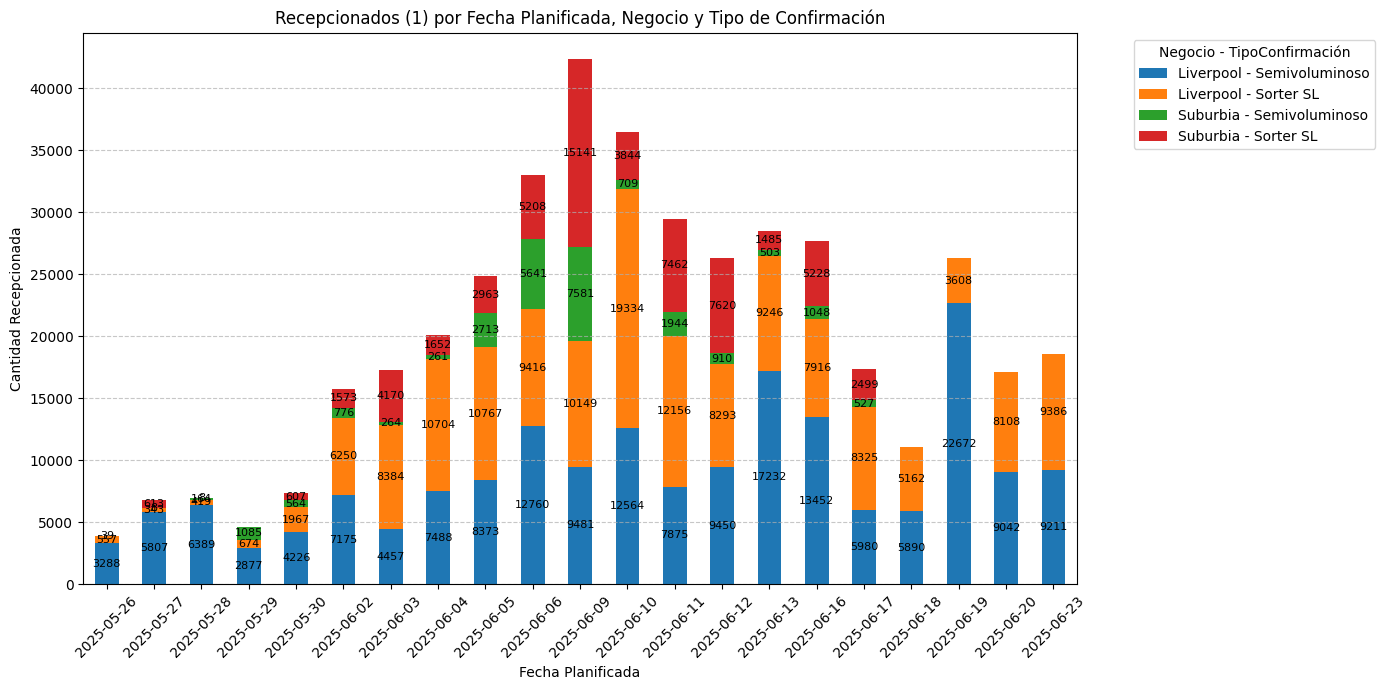

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar formato de fecha
df_total['Fechaplanificada'] = pd.to_datetime(df_total['Fechaplanificada'])

# Filtrar solo Recepcionado = 1
df_total_filtrado = df_total[df_total['Recepcionado'] == 1]

# Agrupar por fecha, negocio y tipo de confirmación
df_total_grouped = df_total_filtrado.groupby([
    df_total_filtrado['Fechaplanificada'].dt.date,
    'Neg',
    'TipoConfirmacion'
]).size().reset_index(name='Cantidad')

# Crear categoría combinada
df_total_grouped['Categoria'] = df_total_grouped['Neg'] + ' - ' + df_total_grouped['TipoConfirmacion']

# Pivot para graficar
pivot_table = df_total_grouped.pivot(index='Fechaplanificada', columns='Categoria', values='Cantidad').fillna(0)

# Crear gráfico de barras apiladas
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(14, 7))

# Etiquetas adaptativas: solo si el valor es >= 5
for i, row in enumerate(pivot_table.values):
    y_offset = 0
    for j, value in enumerate(row):
        if value > 0:
            if value >= 5:
                ax.text(i, y_offset + value / 2, f'{int(value)}', ha='center', va='center', fontsize=8)
            y_offset += value

# Ajustes visuales
plt.title('Recepcionados (1) por Fecha Planificada, Negocio y Tipo de Confirmación')
plt.xlabel('Fecha Planificada')
plt.ylabel('Cantidad Recepcionada')
plt.xticks(rotation=45)
plt.legend(title='Negocio - TipoConfirmación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



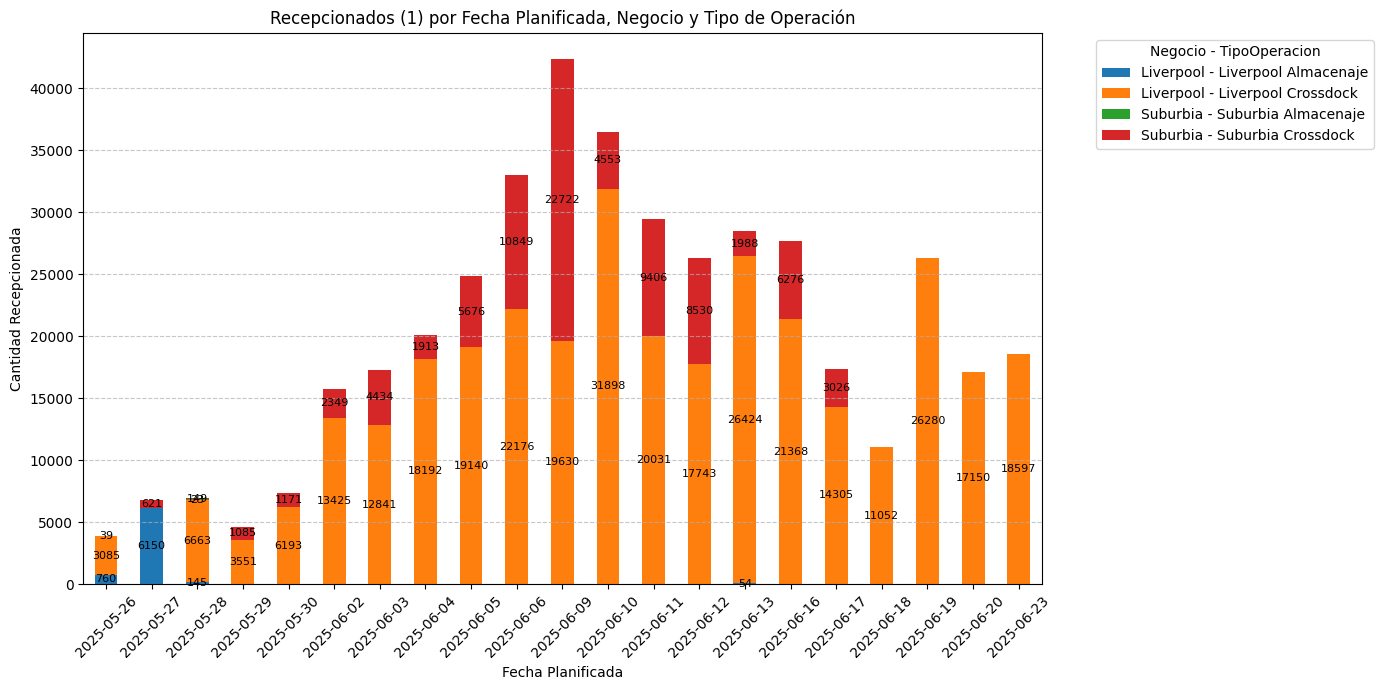

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar que la columna de fecha esté en formato datetime
df_total['Fechaplanificada'] = pd.to_datetime(df_total['Fechaplanificada'])

# Filtrar donde Recepcionado == 1
df_total_filtrado = df_total[df_total['Recepcionado'] == 1]

# Agrupar por Fechaplanificada, Neg y TipoOperacion
df_total_grouped = df_total_filtrado.groupby([
    df_total_filtrado['Fechaplanificada'].dt.date,
    'Neg',
    'TipoOperacion'
]).size().reset_index(name='Cantidad')

# Crear una columna combinada para usar en el gráfico
df_total_grouped['Categoria'] = df_total_grouped['Neg'] + ' - ' + df_total_grouped['TipoOperacion']

# Pivotear para preparar tabla
pivot_table = df_total_grouped.pivot(index='Fechaplanificada', columns='Categoria', values='Cantidad').fillna(0)
# Crear gráfico de barras apiladas
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(14, 7))

# Añadir etiquetas adaptativas: solo si el valor es >= 5
for i, row in enumerate(pivot_table.values):
    y_offset = 0
    for val in row:
        if val > 0:
            if val >= 5:
                ax.text(i, y_offset + val / 2, str(int(val)), ha='center', va='center', fontsize=8)
            y_offset += val

# Ajustes visuales
plt.title('Recepcionados (1) por Fecha Planificada, Negocio y Tipo de Operación')
plt.xlabel('Fecha Planificada')
plt.ylabel('Cantidad Recepcionada')
plt.xticks(rotation=45)
plt.legend(title='Negocio - TipoOperacion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


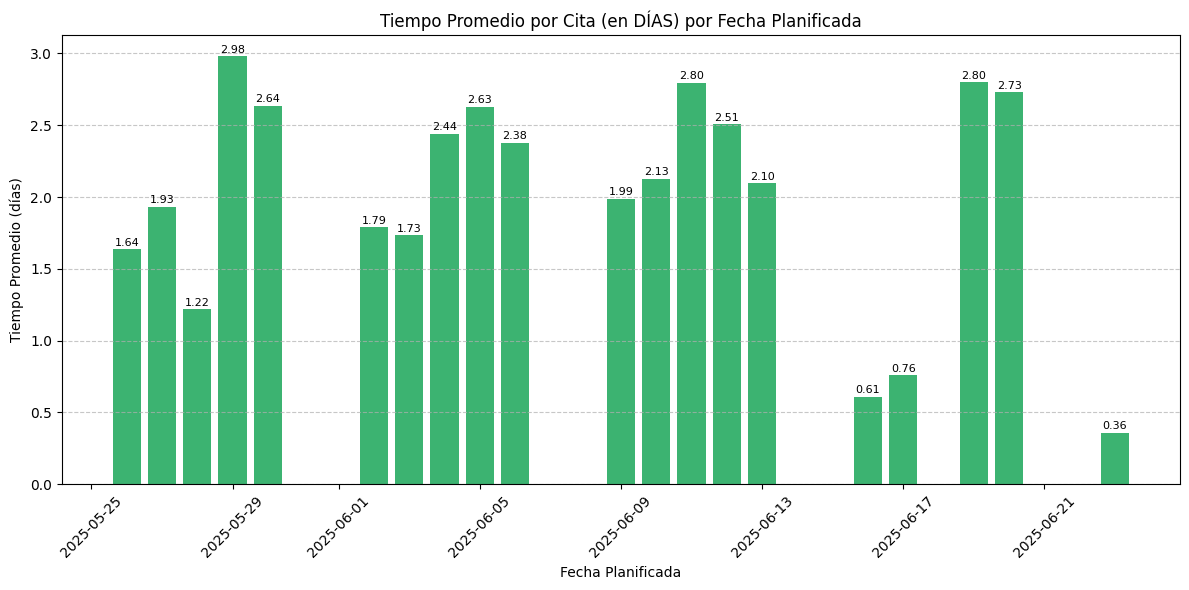

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar formato correcto
df_total['Fechaplanificada'] = pd.to_datetime(df_total['Fechaplanificada'], errors='coerce')
df_total['Tiempointerno'] = pd.to_timedelta(df_total['Tiempointerno'], errors='coerce')

# Filtrar valores válidos
df_total_filtrado = df_total.dropna(subset=['Fechaplanificada', 'Tiempointerno', 'IdMdTransp'])

# Agrupar por día y calcular promedio de tiempo
df_total_avg = df_total_filtrado.groupby(df_total_filtrado['Fechaplanificada'].dt.date)['Tiempointerno'].mean().reset_index()

# Convertir a días
df_total_avg['TiempoPromedioDias'] = df_total_avg['Tiempointerno'].dt.total_seconds() / 86400  # 86400 seg = 1 día

# Crear gráfica de barras
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(df_total_avg['Fechaplanificada'], df_total_avg['TiempoPromedioDias'], color='mediumseagreen')

# Etiquetas adaptativas
for i, val in enumerate(df_total_avg['TiempoPromedioDias']):
    if val > 0:
        ax.text(df_total_avg['Fechaplanificada'][i], val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=8)

# Estética
plt.title('Tiempo Promedio por Cita (en DÍAS) por Fecha Planificada')
plt.xlabel('Fecha Planificada')
plt.ylabel('Tiempo Promedio (días)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [46]:
import pandas as pd
from IPython.display import display

df_total['Fechaplanificada'] = pd.to_datetime(df_total['Fechaplanificada'], errors='coerce')
df_total['Tiempointerno'] = pd.to_timedelta(df_total['Tiempointerno'], errors='coerce')

# Filtrar datos válidos
df_total_filtrado = df_total.dropna(subset=['Fechaplanificada', 'Tiempointerno', 'IdMdTransp'])

# Agrupar y calcular
tabla = df_total_filtrado.groupby(df_total_filtrado['Fechaplanificada'].dt.date).agg(
    Citas_Unicas=('IdMdTransp', 'nunique'),
    Tiempo_Promedio_Dias=('Tiempointerno', lambda x: x.mean().total_seconds() / 86400)
).reset_index().rename(columns={'Fechaplanificada': 'Fecha Planificada'})

# Filtrar valores positivos y redondear
tabla['Tiempo_Promedio_Dias'] = tabla['Tiempo_Promedio_Dias'].round(2)
tabla = tabla[tabla['Tiempo_Promedio_Dias'] > 0]

# Ordenar de mayor a menor
tabla = tabla.sort_values(by='Tiempo_Promedio_Dias', ascending=False)

# Mostrar con scroll
display(tabla.style.set_sticky().set_table_attributes("style='display:inline-block;overflow:auto;height:500px;'"))





,Fecha Planificada,Citas_Unicas,Tiempo_Promedio_Dias
3,2025-05-29,33,2.980000
17,2025-06-19,50,2.800000
12,2025-06-11,119,2.800000
18,2025-06-20,61,2.730000
4,2025-05-30,36,2.640000
8,2025-06-05,88,2.630000
13,2025-06-12,85,2.510000
7,2025-06-04,86,2.440000
9,2025-06-06,134,2.380000
11,2025-06-10,124,2.130000


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


df_total['Fechaplanificada'] = pd.to_datetime(df_total['Fechaplanificada'], errors='coerce')
df_total['Tiempointerno'] = pd.to_timedelta(df_total['Tiempointerno'], errors='coerce')

# 🔍 FILTRAR TIEMPOS > 0
df_total = df_total[df_total['Tiempointerno'].dt.total_seconds() > 0]

# --- FUNCIONES DEL DASHBOARD ---

# 1️⃣ Recepcionados Apilado
def grafica_apilada():
    df_total_filtrado = df_total[df_total['Recepcionado'] == 1]
    df_total_grouped = df_total_filtrado.groupby([
        df_total_filtrado['Fechaplanificada'].dt.date,
        'Neg',
        'TipoConfirmacion'
    ]).size().reset_index(name='Cantidad')

    df_total_grouped['Categoria'] = df_total_grouped['Neg'] + ' - ' + df_total_grouped['TipoConfirmacion']
    pivot_table = df_total_grouped.pivot(index='Fechaplanificada', columns='Categoria', values='Cantidad').fillna(0)

    ax = pivot_table.plot(kind='bar', stacked=True, figsize=(14, 6))
    for i, row in enumerate(pivot_table.values):
        y_offset = 0
        for j, value in enumerate(row):
            if value >= 5:
                ax.text(i, y_offset + value / 2, f'{int(value)}', ha='center', va='center', fontsize=8)
            y_offset += value
    plt.title('Recepcionados por Fecha, Negocio y Tipo de Confirmación')
    plt.xlabel('Fecha Planificada')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.legend(title='Negocio - Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# 2️⃣ Tiempo promedio por fecha
def grafica_tiempo_general():
    df_total_filtrado = df_total.dropna(subset=['Fechaplanificada', 'Tiempointerno', 'IdMdTransp'])
    df_total_avg = df_total_filtrado.groupby(df_total_filtrado['Fechaplanificada'].dt.date)['Tiempointerno'].mean().reset_index()
    df_total_avg['TiempoPromedioDias'] = df_total_avg['Tiempointerno'].dt.total_seconds() / 86400

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(df_total_avg['Fechaplanificada'], df_total_avg['TiempoPromedioDias'], color='seagreen')
    for i, val in enumerate(df_total_avg['TiempoPromedioDias']):
        ax.text(df_total_avg['Fechaplanificada'][i], val + 0.01, f'{val:.2f}', ha='center', fontsize=8)
    plt.title('Tiempo Promedio por Cita (días) por Fecha')
    plt.xlabel('Fecha Planificada')
    plt.ylabel('Tiempo Promedio (días)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# 3️⃣ Tiempo promedio por cita segmentado por negocio
def grafica_tiempo_por_neg():
    df_total_seg = df_total.dropna(subset=['Fechaplanificada', 'Tiempointerno', 'IdMdTransp', 'Neg']).copy()
    df_total_seg['Fecha'] = df_total_seg['Fechaplanificada'].dt.date
    df_total_prom = df_total_seg.groupby(['Fecha', 'Neg'])['Tiempointerno'].mean().reset_index()
    df_total_prom['TiempoPromedioDias'] = df_total_prom['Tiempointerno'].dt.total_seconds() / 86400
    pivot = df_total_prom.pivot(index='Fecha', columns='Neg', values='TiempoPromedioDias').fillna(0)

    fig, ax = plt.subplots(figsize=(14, 6))
    pivot.plot(kind='bar', stacked=False, ax=ax)
    for i, fecha in enumerate(pivot.index):
        for j, neg in enumerate(pivot.columns):
            val = pivot.iloc[i, j]
            if val > 0:
                ax.text(i + j * 0.1 - 0.2, val + 0.01, f'{val:.2f}', ha='center', fontsize=7)
    plt.title('Tiempo Promedio por Cita por Fecha y Negocio')
    plt.xlabel('Fecha Planificada')
    plt.ylabel('Tiempo Promedio (días)')
    plt.xticks(rotation=45)
    plt.legend(title='Negocio', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# 4️⃣ Tabla Ejecutiva
def tabla_interactiva():
    df_total_filtrado = df_total.dropna(subset=['Fechaplanificada', 'Tiempointerno', 'IdMdTransp'])
    tabla = df_total_filtrado.groupby(df_total_filtrado['Fechaplanificada'].dt.date).agg(
        Citas_Unicas=('IdMdTransp', 'nunique'),
        Tiempo_Promedio_Dias=('Tiempointerno', lambda x: x.mean().total_seconds() / 86400)
    ).reset_index().rename(columns={'Fechaplanificada': 'Fecha Planificada'})
    tabla['Tiempo_Promedio_Dias'] = tabla['Tiempo_Promedio_Dias'].round(2)
    tabla = tabla[tabla['Tiempo_Promedio_Dias'] > 0]
    tabla = tabla.sort_values(by='Tiempo_Promedio_Dias', ascending=False)
    display(tabla.style.set_sticky().set_table_attributes("style='display:inline-block;overflow:auto;height:500px;'"))

# --- DASHBOARD CON PESTAÑAS ---
tab = widgets.Tab()
tab.children = [widgets.Output() for _ in range(4)]
tab.set_title(0, 'Recepcionados Apilado')
tab.set_title(1, 'Tiempo Prom. General')
tab.set_title(2, 'Tiempo por Negocio')
tab.set_title(3, 'Tabla Ejecutiva')

with tab.children[0]: grafica_apilada()
with tab.children[1]: grafica_tiempo_general()
with tab.children[2]: grafica_tiempo_por_neg()
with tab.children[3]: tabla_interactiva()

display(tab)



In [48]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt

# --- CONFIGURACIÓN INICIAL ---
st.set_page_config(layout="wide", page_title="Dashboard Logístico")

df_total['Fechaplanificada'] = pd.to_datetime(df_total['Fechaplanificada'], errors='coerce')
df_total['Tiempointerno'] = pd.to_timedelta(df_total['Tiempointerno'], errors='coerce')
df_total = df_total[df_total['Tiempointerno'].dt.total_seconds() > 0]  # Solo mayores a 0

# --- TÍTULO ---
st.title("Dashboard Logístico: Recepción y Tiempos de Cita")

# --- PESTAÑAS ---
tab1, tab2, tab3, tab4, tab5 = st.tabs([
    "Recepcionados Apilado",
    "Tiempo Prom. General",
    "Tiempo por Negocio",
    "Tabla Ejecutiva",
    "Mediana y P90"
])

# --- TAB 1 ---
with tab1:
    st.subheader("Recepcionados por Fecha, Negocio y Confirmación")
    df_total_f = df_total[df_total['Recepcionado'] == 1]
    group = df_total_f.groupby([df_total_f['Fechaplanificada'].dt.date, 'Neg', 'TipoConfirmacion']).size().reset_index(name='Cantidad')
    group['Categoria'] = group['Neg'] + ' - ' + group['TipoConfirmacion']
    pivot = group.pivot(index='Fechaplanificada', columns='Categoria', values='Cantidad').fillna(0)

    fig, ax = plt.subplots(figsize=(12, 6))
    pivot.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title("Recepcionados Apilado")
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Cantidad")
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    st.pyplot(fig)

# --- TAB 2 ---
with tab2:
    st.subheader("⏱ Tiempo Promedio General por Fecha (días)")
    df_total_fil = df_total.dropna(subset=['Fechaplanificada', 'Tiempointerno', 'IdMdTransp'])
    df_total_avg = df_total_fil.groupby(df_total_fil['Fechaplanificada'].dt.date)['Tiempointerno'].mean().reset_index()
    df_total_avg['Dias'] = df_total_avg['Tiempointerno'].dt.total_seconds() / 86400

    fig2, ax2 = plt.subplots(figsize=(12, 5))
    ax2.bar(df_total_avg['Fechaplanificada'], df_total_avg['Dias'], color='seagreen')
    ax2.set_title("Tiempo Promedio por Día")
    ax2.set_ylabel("Días")
    ax2.grid(axis='y', linestyle='--', alpha=0.6)
    st.pyplot(fig2)

# --- TAB 3 ---
with tab3:
    st.subheader("Tiempo Promedio por Fecha y Negocio")
    df_total_n = df_total.dropna(subset=['Fechaplanificada', 'Tiempointerno', 'IdMdTransp', 'Neg'])
    df_total_n['Fecha'] = df_total_n['Fechaplanificada'].dt.date
    df_total_p = df_total_n.groupby(['Fecha', 'Neg'])['Tiempointerno'].mean().reset_index()
    df_total_p['Dias'] = df_total_p['Tiempointerno'].dt.total_seconds() / 86400
    pivot2 = df_total_p.pivot(index='Fecha', columns='Neg', values='Dias').fillna(0)

    fig3, ax3 = plt.subplots(figsize=(14, 6))
    pivot2.plot(kind='bar', stacked=False, ax=ax3)
    ax3.set_title("Tiempo Promedio por Negocio")
    ax3.set_ylabel("Días")
    ax3.grid(axis='y', linestyle='--', alpha=0.6)
    st.pyplot(fig3)

# --- TAB 4 ---
with tab4:
    st.subheader("Tabla Ejecutiva de Citas y Tiempo Promedio")
    tabla = df_total.groupby(df_total['Fechaplanificada'].dt.date).agg(
        Citas=('IdMdTransp', 'nunique'),
        Tiempo_Promedio_Dias=('Tiempointerno', lambda x: x.mean().total_seconds() / 86400)
    ).reset_index()
    tabla = tabla[tabla['Tiempo_Promedio_Dias'] > 0]
    tabla['Tiempo_Promedio_Dias'] = tabla['Tiempo_Promedio_Dias'].round(2)
    st.dataframe(tabla.sort_values(by='Tiempo_Promedio_Dias', ascending=False), use_container_width=True)

# --- TAB 5 ---
with tab5:
    st.subheader("Mediana y P90 por Fecha")
    df_total_s = df_total.dropna(subset=['Fechaplanificada', 'Tiempointerno', 'IdMdTransp'])
    df_total_s['Fecha'] = df_total_s['Fechaplanificada'].dt.date
    estad = df_total_s.groupby('Fecha')['Tiempointerno'].apply(lambda x: pd.Series({
        'Media': x.mean().total_seconds() / 86400,
        'Mediana': x.median().total_seconds() / 86400,
        'P90': x.quantile(0.9).total_seconds() / 86400
    })).unstack().round(2).reset_index()
    st.dataframe(estad, use_container_width=True)


2025-06-25 18:26:04.050 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 18:26:04.221 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 18:26:04.222 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 18:26:04.223 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 18:26:04.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 18:26:04.225 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 18:26:04.225 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 18:26:04.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

/tmp/ipython-input-49-1472427436.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Contabilizacion_a_Enramp'] = (df_filtrado['Contabilizacion'] - df_filtrado['Enramp']).dt.total_seconds() / 3600


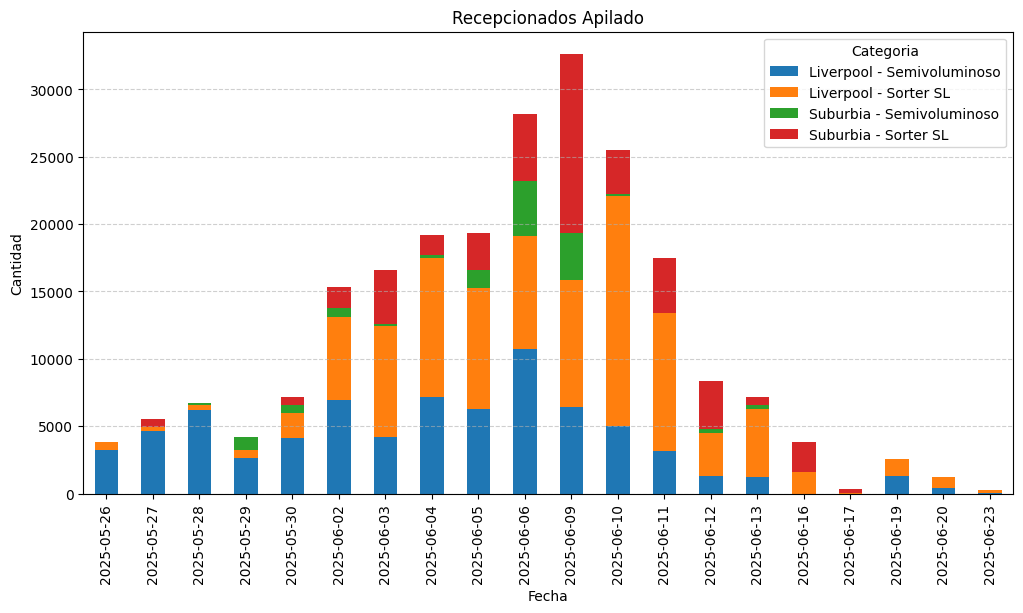

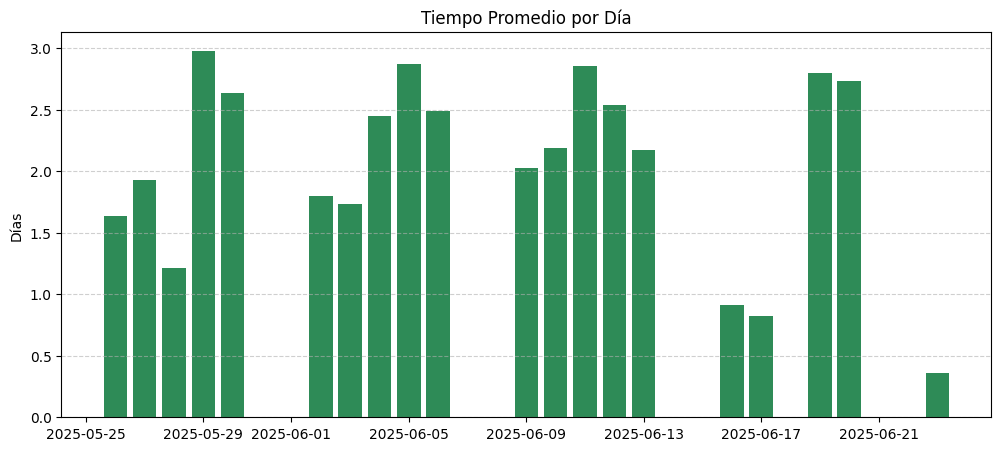

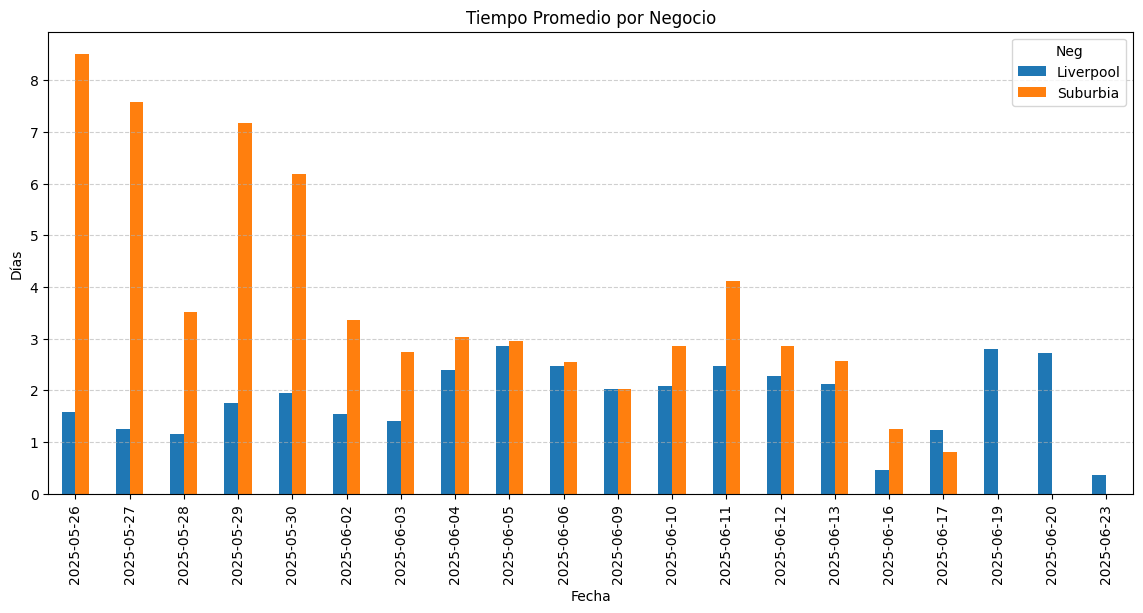

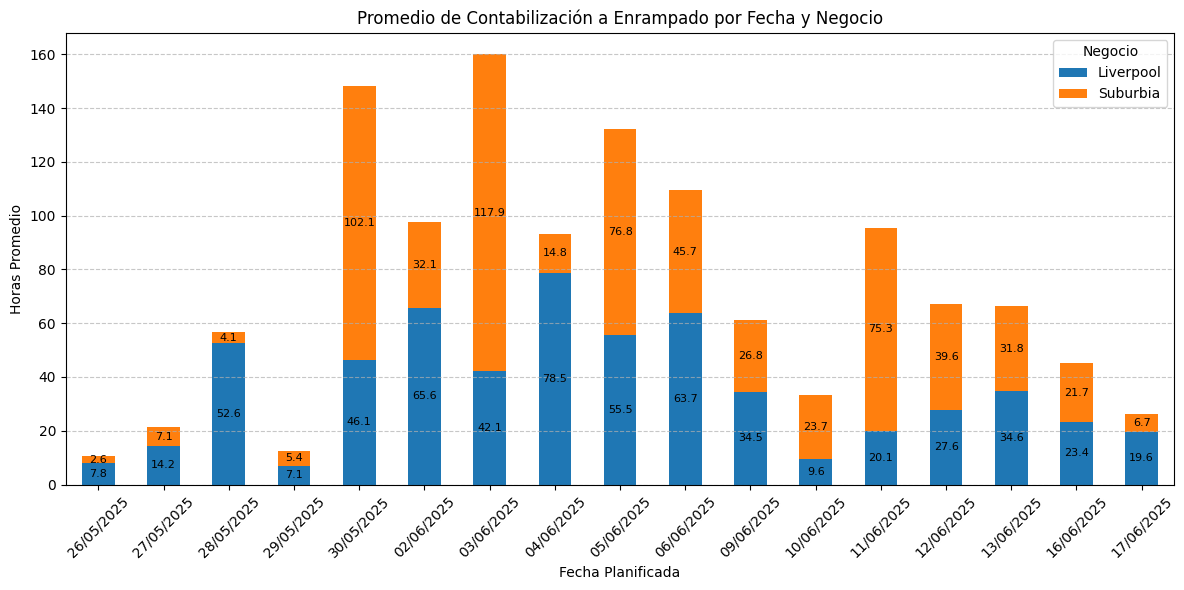

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Asegurarse de que las columnas de tiempo sean datetime
df_total['Contabilizacion'] = pd.to_datetime(df_total['Contabilizacion'], errors='coerce')
df_total['Enramp'] = pd.to_datetime(df_total['Enramp'], errors='coerce')

# Eliminar filas con valores nulos en las columnas necesarias
df_filtrado = df_total.dropna(subset=['Contabilizacion', 'Enramp', 'Fechaplanificada', 'Neg'])

# Calcular diferencia en horas
df_filtrado['Contabilizacion_a_Enramp'] = (df_filtrado['Contabilizacion'] - df_filtrado['Enramp']).dt.total_seconds() / 3600

# Agrupar por fecha planificada y negocio, y calcular el promedio
df_grouped = df_filtrado.groupby(['Fechaplanificada', 'Neg'])['Contabilizacion_a_Enramp'].mean().unstack().fillna(0)

# Crear gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 6))
df_grouped.index = pd.to_datetime(df_grouped.index)  # asegurar formato de fecha

bars = df_grouped.plot(kind='bar', stacked=True, ax=ax)

# Etiquetas de datos
for i, fecha in enumerate(df_grouped.index):
    y_offset = 0
    for j, negocio in enumerate(df_grouped.columns):
        valor = df_grouped.iloc[i, j]
        if valor > 0:
            ax.text(i, y_offset + valor / 2, f'{valor:.1f}', ha='center', va='center', fontsize=8)
            y_offset += valor

# Formato del eje x como DD/MM/YYYY
ax.set_xticklabels([fecha.strftime('%d/%m/%Y') for fecha in df_grouped.index], rotation=45)

plt.title('Promedio de Contabilización a Enrampado por Fecha y Negocio')
plt.xlabel('Fecha Planificada')
plt.ylabel('Horas Promedio')
plt.tight_layout()
plt.legend(title='Negocio')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Guardar imagen
plt.savefig("contabilizacion_a_enramp.png", dpi=300)
plt.show()




In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Convertir fechas y tiempos
df_total['Fechaplanificada'] = pd.to_datetime(df_total['Fechaplanificada'], errors='coerce')
df_total['Tiempointerno'] = pd.to_timedelta(df_total['Tiempointerno'], errors='coerce')
df_total['Contabilizacion'] = pd.to_datetime(df_total['Contabilizacion'], errors='coerce')
df_total['Enramp'] = pd.to_datetime(df_total['Enramp'], errors='coerce')
df_total = df_total[df_total['Tiempointerno'].dt.total_seconds() > 0]

# Obtener valores únicos para los filtros
negocios_unicos = sorted(df_total['Neg'].dropna().unique())
fechas_unicas = sorted(df_total['Fechaplanificada'].dropna().dt.date.unique())

# --- Filtros dinámicos ---
neg_dropdown = widgets.SelectMultiple(
    options=negocios_unicos,
    value=tuple(negocios_unicos),  # selecciona todos por default
    description='Negocio:',
    layout=widgets.Layout(width='50%'),
)

fecha_slider = widgets.SelectionRangeSlider(
    options=fechas_unicas,
    index=(0, len(fechas_unicas)-1),
    description='Fechas:',
    orientation='horizontal',
    layout=widgets.Layout(width='95%'),
    continuous_update=False
)

# Contenedor de pestañas
tab = widgets.Tab()
tab.children = [widgets.Output() for _ in range(5)]
tab.set_title(0, 'Recepcionados Apilado')
tab.set_title(1, 'Tiempo Prom. General')
tab.set_title(2, 'Tiempo por Negocio')
tab.set_title(3, 'Tabla Ejecutiva')
tab.set_title(4, 'Contab. vs Enramp')

# Función para filtrar globalmente y actualizar todas las gráficas
def actualizar_dashboard(*args):
    fecha_ini, fecha_fin = fecha_slider.value
    negocios_sel = list(neg_dropdown.value)

    df_filt = df_total[
        df_total['Fechaplanificada'].dt.date.between(fecha_ini, fecha_fin) &
        df_total['Neg'].isin(negocios_sel)
    ].copy()

    # Limpiar contenido de pestañas
    for out in tab.children:
        out.clear_output()

    # 1️⃣ Apilado
    with tab.children[0]:
        display(widgets.HTML(value="<b>Recepcionados Apilado</b>"))
        df_filtrado = df_filt[df_filt['Recepcionado'] == 1]
        df_grouped = df_filtrado.groupby([
            df_filtrado['Fechaplanificada'].dt.date,
            'Neg', 'TipoConfirmacion'
        ]).size().reset_index(name='Cantidad')
        if not df_grouped.empty:
            df_grouped['Categoria'] = df_grouped['Neg'] + ' - ' + df_grouped['TipoConfirmacion']
            pivot = df_grouped.pivot(index='Fechaplanificada', columns='Categoria', values='Cantidad').fillna(0)
            ax = pivot.plot(kind='bar', stacked=True, figsize=(14, 6))
            for i, row in enumerate(pivot.values):
                y_offset = 0
                for value in row:
                    if value > 0:
                        ax.text(i, y_offset + value / 2, f'{int(value)}', ha='center', va='center', fontsize=8)
                        y_offset += value
            ax.set_xticklabels([pd.to_datetime(d).strftime('%d/%m/%Y') for d in pivot.index], rotation=45)
            plt.title('Recepcionados por Fecha, Negocio y Tipo de Confirmación')
            plt.xlabel('Fecha Planificada')
            plt.ylabel('Cantidad')
            plt.grid(axis='y', linestyle='--', alpha=0.6)
            plt.tight_layout()
            plt.show()

    # 2️⃣ Tiempo promedio general
    with tab.children[1]:
        display(widgets.HTML(value="<b>Tiempo Promedio General</b>"))
        df_avg = df_filt.dropna(subset=['Fechaplanificada', 'Tiempointerno', 'IdMdTransp'])
        df_avg = df_avg.groupby(df_avg['Fechaplanificada'].dt.date)['Tiempointerno'].mean().reset_index()
        df_avg['PromDias'] = df_avg['Tiempointerno'].dt.total_seconds() / 86400
        if not df_avg.empty:
            fig, ax = plt.subplots(figsize=(12, 5))
            ax.bar(df_avg['Fechaplanificada'], df_avg['PromDias'], color='seagreen')
            for i, val in enumerate(df_avg['PromDias']):
                ax.text(df_avg['Fechaplanificada'][i], val + 0.01, f'{val:.2f}', ha='center', fontsize=8)
            ax.set_xticklabels([pd.to_datetime(d).strftime('%d/%m/%Y') for d in df_avg['Fechaplanificada']], rotation=45)
            plt.title('Tiempo Promedio por Cita (días) por Fecha')
            plt.xlabel('Fecha Planificada')
            plt.ylabel('Tiempo Promedio (días)')
            plt.grid(axis='y', linestyle='--', alpha=0.6)
            plt.tight_layout()
            plt.show()

    # 3️⃣ Por negocio
    with tab.children[2]:
        display(widgets.HTML(value="<b>Tiempo por Negocio</b>"))
        df_seg = df_filt.dropna(subset=['Fechaplanificada', 'Tiempointerno', 'Neg', 'IdMdTransp']).copy()
        df_seg['Fecha'] = df_seg['Fechaplanificada'].dt.date
        df_prom = df_seg.groupby(['Fecha', 'Neg'])['Tiempointerno'].mean().reset_index()
        df_prom['PromDias'] = df_prom['Tiempointerno'].dt.total_seconds() / 86400
        pivot = df_prom.pivot(index='Fecha', columns='Neg', values='PromDias').fillna(0)
        if not pivot.empty:
            fig, ax = plt.subplots(figsize=(14, 6))
            pivot.plot(kind='bar', stacked=False, ax=ax)
            for i, fecha in enumerate(pivot.index):
                for j, neg in enumerate(pivot.columns):
                    val = pivot.iloc[i, j]
                    if val > 0:
                        ax.text(i + j * 0.1 - 0.2, val + 0.01, f'{val:.2f}', ha='center', fontsize=7)
            ax.set_xticklabels([pd.to_datetime(f).strftime('%d/%m/%Y') for f in pivot.index], rotation=45)
            plt.title('Tiempo Promedio por Cita por Fecha y Negocio')
            plt.xlabel('Fecha Planificada')
            plt.ylabel('Tiempo Promedio (días)')
            plt.grid(axis='y', linestyle='--', alpha=0.6)
            plt.tight_layout()
            plt.show()

    # 4️⃣ Tabla
    with tab.children[3]:
        display(widgets.HTML(value="<b>Tabla Ejecutiva</b>"))
        tabla = df_filt.dropna(subset=['Fechaplanificada', 'Tiempointerno', 'IdMdTransp'])
        tabla = tabla.groupby(tabla['Fechaplanificada'].dt.date).agg(
            Citas_Unicas=('IdMdTransp', 'nunique'),
            Tiempo_Promedio_Dias=('Tiempointerno', lambda x: x.mean().total_seconds() / 86400)
        ).reset_index()
        tabla['Tiempo_Promedio_Dias'] = tabla['Tiempo_Promedio_Dias'].round(2)
        tabla = tabla.sort_values(by='Tiempo_Promedio_Dias', ascending=False)
        display(tabla.style.set_sticky().set_table_attributes("style='display:inline-block;overflow:auto;height:400px;'"))

    # 5️⃣ Contabilización a Enrampado
    with tab.children[4]:
        display(widgets.HTML(value="<b>Contabilización a Enrampado</b>"))
        df_temp = df_filt.dropna(subset=['Contabilizacion', 'Enramp']).copy()
        df_temp['Contabilizacion_a_Enramp'] = (df_temp['Contabilizacion'] - df_temp['Enramp']).dt.total_seconds() / 3600
        df_grouped = df_temp.groupby(['Fechaplanificada', 'Neg'])['Contabilizacion_a_Enramp'].mean().unstack().fillna(0)
        df_grouped.index = pd.to_datetime(df_grouped.index)
        if not df_grouped.empty:
            fig, ax = plt.subplots(figsize=(12, 6))
            df_grouped.plot(kind='bar', stacked=True, ax=ax)
            for i, fecha in enumerate(df_grouped.index):
                y_offset = 0
                for j, negocio in enumerate(df_grouped.columns):
                    valor = df_grouped.iloc[i, j]
                    if valor > 0:
                        ax.text(i, y_offset + valor / 2, f'{valor:.1f}', ha='center', va='center', fontsize=8)
                        y_offset += valor
            ax.set_xticklabels([fecha.strftime('%d/%m/%Y') for fecha in df_grouped.index], rotation=45)
            plt.title('Promedio de Contabilización a Enrampado por Fecha y Negocio')
            plt.xlabel('Fecha Planificada')
            plt.ylabel('Horas Promedio')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

# Asociar eventos a cambios en filtros
neg_dropdown.observe(actualizar_dashboard, names='value')
fecha_slider.observe(actualizar_dashboard, names='value')

# Mostrar filtros y dashboard
display(widgets.VBox([neg_dropdown, fecha_slider]))
actualizar_dashboard()  # inicial
display(tab)
